# Get Cracker Barrel locations

#### Load Python tools and Jupyter config

In [1]:
%load_ext lab_black

In [2]:
import pandas as pd
import os

os.environ["USE_PYGEOS"] = "0"
import geopandas as gpd

In [3]:
pd.options.display.max_columns = 100
pd.options.display.max_rows = 1000
pd.options.display.max_colwidth = None

## Read data

#### Pull all the locations from the company's restuarant locator

In [4]:
limit = 1000
radius = 10000
lat = 33.9863036
lon = -118.4230489

#### It can't be that easy to get them all, right? 

In [5]:
src = pd.read_json(
    f"https://www.crackerbarrel.com/crackerbarrel/api/get/locatorsearch?limit={limit}&radius={radius}&latitude={lat}&longitude=lon"
)

#### The company has ~660 locations in the US, according to [its SEC filings](https://www.sec.gov/ix?doc=/Archives/edgar/data/1067294/000114036120021571/brhc10015333_10k.htm#TEM1). How many do we have?

In [6]:
len(src)

662

---

## Process

#### Clean up column headers

In [7]:
src.columns = src.columns.str.lower()

#### Just the five-digit zip

In [8]:
src["zip"] = src["zip"].str[:5]

#### Just the columns we need

In [9]:
df = src[
    [
        "address1",
        "city",
        "state",
        "zip",
        "storetimezone",
        "storenumber",
        "latitude",
        "longitude",
    ]
].copy()

#### The result:

In [10]:
df.head()

,address1,city,state,zip,storetimezone,storenumber,latitude,longitude
0,357 Maine Mall Rd.,South Portland,ME,04106,-4,665,43.636178,-70.338728
1,1795 Andover St.,Tewksbury,MA,01876,-4,373,42.642227,-71.235402
2,16 Nashua Rd,Londonderry,NH,03053,-4,412,42.873706,-71.339293
3,1048 South Street Suite 40,Wrentham,MA,02093,-4,497,42.037038,-71.348340
4,825 Centre of New England Blvd,Coventry,RI,02816,-4,452,41.661090,-71.546451


#### How many of those are in North Carolina? Looking for [these dudes](https://www.tiktok.com/@josh_and_jase_intheusa/video/7305516072675921185?_r=1&_t=8ieyAydDQmR).

In [11]:
len(df.query('state == "NC"'))

41

#### Found it

In [12]:
df.query('city == "Southern Pines"')

,address1,city,state,zip,storetimezone,storenumber,latitude,longitude
130,10975 US Hwy. 15-501,Southern Pines,NC,28387,-4,688,35.16114,-79.41949


#### Geodataframe from lon/lat

In [13]:
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.longitude, df.latitude), crs="EPSG:4326"
)

#### Plot it

<AxesSubplot: >

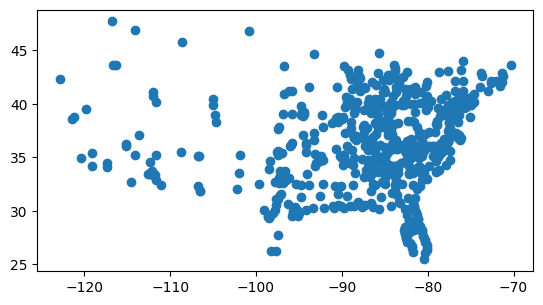

In [14]:
gdf.plot()

In [15]:
df = df.drop(["geometry"], axis=1)

---

## Exports

In [16]:
gdf.to_file("data/processed/cracker_barrel.geojson", driver="GeoJSON")

In [17]:
df.to_json("data/processed/cracker_barrel.json", orient="records", indent=4)

In [18]:
df.to_csv("data/processed/cracker_barrel.csv", index=False)